# SUB-TASK 3

# EDGE DETECTORS

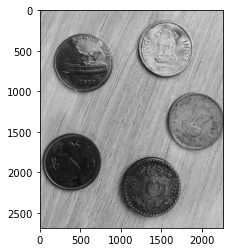

In [93]:
plt.imshow(coin_img, cmap = 'gray')

# Robert Cross Edge Detector

Gx = [[1, 0], [0, -1]]

Gy = [[0, 1], [-1, 0]]

In [109]:
def roberts_cross(img_path, threshold):
    
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    gx = np.array([[1, 0], [0, -1]])
    gy = np.array([[0, 1], [-1, 0]])
    
    gradient_x = ndimage.convolve(image, gx)
    gradient_y = ndimage.convolve(image, gy)
    
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    edges = magnitude > threshold
    
    return edges

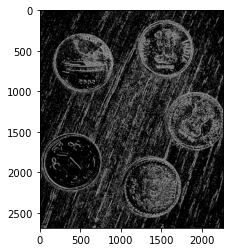

In [113]:
robert_cross_img = roberts_cross('coin-detection.jpg', 10)
plt.imshow(robert_cross_img, cmap='gray')

# Sobel Edge Detector

Gx = [[-1 0 1][-2 0 2][-1 0 1]] 

Gy  = [[-1 -2 -1][0 0 0][1 2 1]]

In [94]:
def sobel_edge_detector(image_path, threshold):
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    edges = magnitude > threshold

    return edges


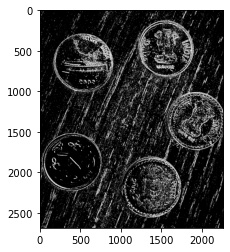

In [98]:
sobel_img = sobel_edge_detector('coin-detection.jpg', 60)
plt.imshow(sobel_img, cmap='gray')

# Canny Edge Detector

Steps:

- Smoothen image
- Find Gx and Gy using Sobel gradient matrices
- Suppress non maximum values

In [127]:
def canny_edge_detector(img_path, t_low=50, t_high=150):
   
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Smoothing out image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Non-maximum suppression
    non_max_suppressed = cv2.Canny(blurred_image, t_low, t_high)

    # Edge tracking by hysteresis
    edges = cv2.Canny(blurred_image, t_low, t_high)

    return edges


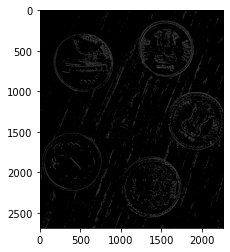

In [131]:
canny_img = canny_edge_detector('coin-detection.jpg', 100, 110)
_, canny_thresh = cv2.threshold(canny_img, 10, 255, cv2.THRESH_BINARY)
plt.imshow(canny_thresh, cmap='gray')

# THRESHOLDING IMAGES

## Simple Threshoding

Threshold based on a single value.

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
# Read the image
image = cv2.imread('sudoku.png', 0)  # 0 to read the image in grayscale

# Simple Thresholding
_, simple_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)



## Adaptive Thresholding

Thresholding based on a window/neighborhood.

In [10]:
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, 11, 2)



## Otsu Thresholding

Maximises class variance between different pixel categories and gives optimum threshold.

In [4]:
# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [5]:
cv2.imwrite("simple_thresh.png", simple_thresh)
cv2.imwrite("adaptive_thresh.png", adaptive_thresh)
cv2.imwrite("otsu_thresh.png", otsu_thresh)


True

In [6]:
from IPython.display import Image

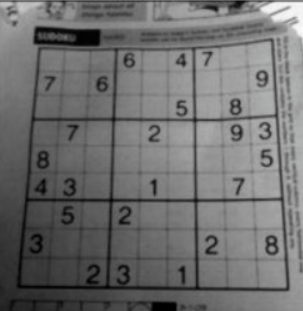

In [7]:
Image("sudoku.png")

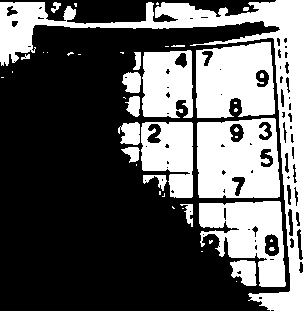

In [8]:
Image("simple_thresh.png")

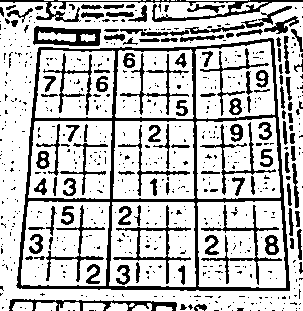

In [9]:
Image("adaptive_thresh.png")

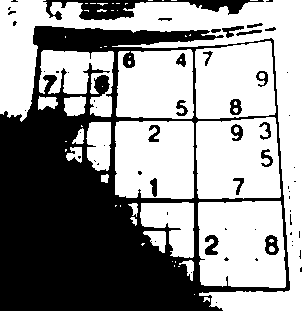

In [11]:
Image("otsu_thresh.png")

# HISTOGRAM EQUALIZATION

- Goal is to improve contrast by:
    - Flattening the histogram profile
    - In other words, linearise the CDF (Cumulative distribution function)

In [13]:
flower_img = cv2.imread("flower_low_contrast.png", 0)

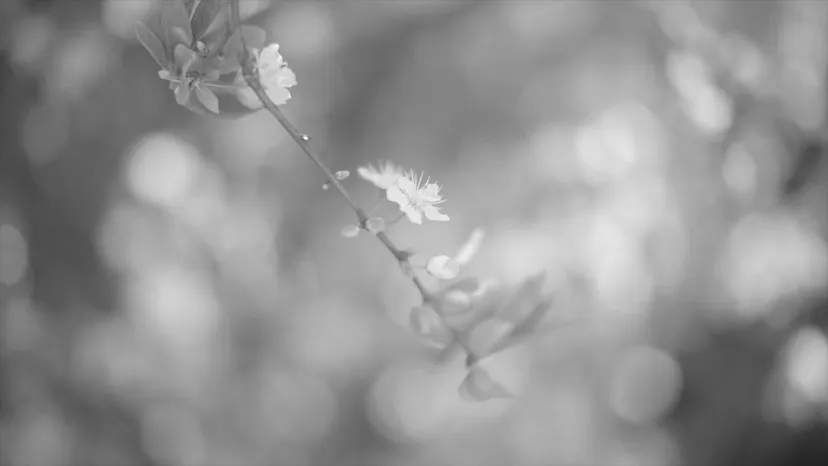

In [22]:
Image("flower_low_contrast.png")

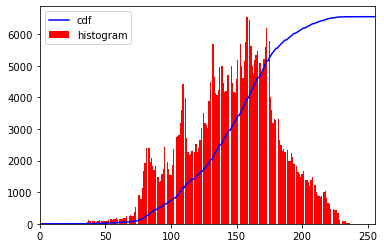

In [18]:
hist,bins = np.histogram(flower_img.flatten(),256,[0,255])

#Cumulative Distribution Function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')

#Frequency Function (PDF)
plt.hist(flower_img.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [21]:
equalized_img = cv2.equalizeHist(img)

In [23]:
cv2.imwrite("flower_equalized.png", equalized_img)

True

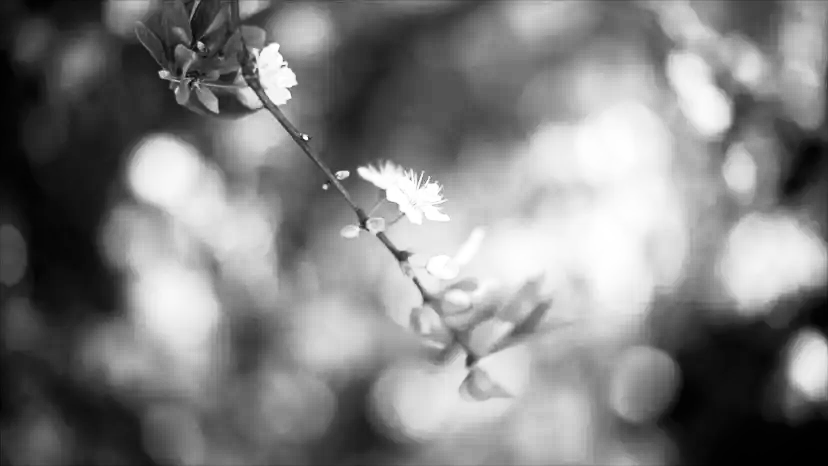

In [24]:
Image("flower_equalized.png")

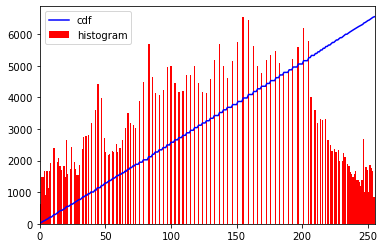

In [25]:
hist_eq,bins_eq = np.histogram(equalized_img.flatten(),256,[0,255])

#Cumulative Distribution Function (CDF)
cdf_eq = hist_eq.cumsum()
cdf_normalized_eq = cdf_eq * float(hist_eq.max()) / cdf_eq.max()
plt.plot(cdf_normalized_eq, color = 'b')

#Frequency Function (PDF)
plt.hist(equalized_img.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# MORPHOLOGICAL OPERATIONS

## Original image

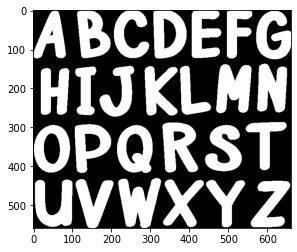

In [50]:

  
# read the image 
X = cv2.imread("alphabet_img.jpg", 0) 
  
# binarize the image 
X_bin = cv2.threshold(X, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  

  
# invert the image 
X_final = cv2.bitwise_not(X_bin) 

plt.imshow(X_final, cmap='gray')

# Erosion

There will be a structure element (SE) which acts as a convolution matrix on every pixel of the image, 
and 
if the SE matches with the window at that instance: it retains the foreground pixel,
else: it converts it to a background pixel.

Represented by: **X - B**

where

X = image

B = Structure Element (Kernel)

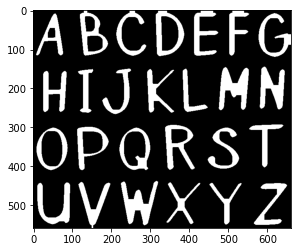

In [36]:
# define the kernel 
B_erosion = np.ones((5, 5), np.uint8) #Structure Element 5x5
  
# erode the image 
erosion = cv2.erode(X_final, B_erosion, 
                    iterations=3) 
  
# print the output 
plt.imshow(erosion, cmap='gray') 

# Dilation

If the seat point of SE is a foreground pixel and the window pixel of the image is a foreground pixel, the entire space occupied by the SE in the image becomes a foreground pixel.

It is represented by: **X + B**

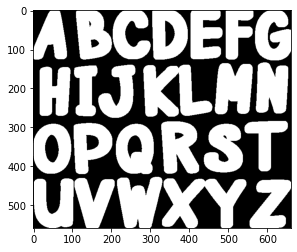

In [37]:
B_dilation = np.ones((3, 3), np.uint8) 

dilation = cv2.dilate(X_final, B_dilation, 
                    iterations=3) 

plt.imshow(dilation, cmap='gray') 

# Opening (OED)

- **(X - B) + B**
- Used to remove stray foreground pixels from background
- Clears out noise and small objects

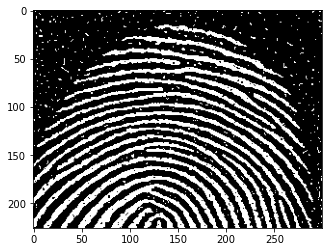

In [41]:
fingerprint = cv2.imread("fingerprint.png", 0)

f_bin = cv2.threshold(fingerprint, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 

plt.imshow(f_bin, cmap='gray')

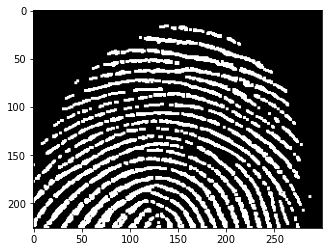

In [44]:
kernel = np.ones((3, 3), np.uint8) 
  
 
opening = cv2.morphologyEx(f_bin, cv2.MORPH_OPEN, 
                           kernel, iterations=1)  
plt.imshow(opening, cmap='gray') 

# Closing (CDE)

- **(X + B) - B**
- Used to remove background holes in foreground object
- Fills out gaps and holes

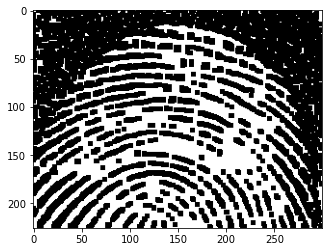

In [48]:
kernel = np.ones((3, 3), np.uint8) 
  
# opening the image 
closing = cv2.morphologyEx(f_bin, cv2.MORPH_CLOSE, kernel, iterations=2) 
  
# print the output 
plt.imshow(closing, cmap='gray')

# Gradient (Dilation - Erosion)

- **(X + B) - (X-B)**
- Used to form an outline of the target foreground object

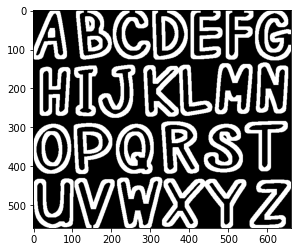

In [39]:
plt.imshow(dilation - erosion, cmap='gray')

# Translation

- Moving the image by an offset of a particular displacement {u, v}

Transformation Matrix:

[

[1 0 u]

[0 1 v]

]

Now to displace image by a fifth of its size:

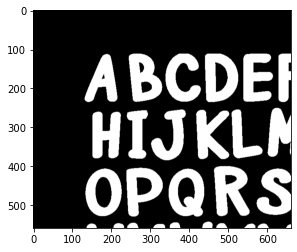

In [56]:
height, width = X_final.shape[:2] 
  
u, v = width/5 , height/5
  
T = np.float32([[1, 0, u], [0, 1, v]]) 
  
# We use warpAffine() to transform the image using transformation matrix T 



translation = cv2.warpAffine(X_final, T, (width, height))

plt.imshow(translation, cmap='gray')

# Rotation

Rotation Matrix:

[cos A    -sin A]

[sin A     cos A]

where A is the angle by which we want to rotate.

We can use warpAffine(), but rotate() method can be directly used to rotate by 90 degree intervals.

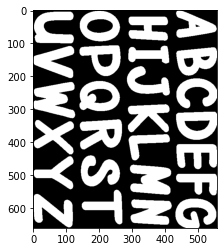

In [57]:
rotation = cv2.rotate(X_final, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rotation, cmap='gray')

# Image segmentation using thresholding & morphological operations

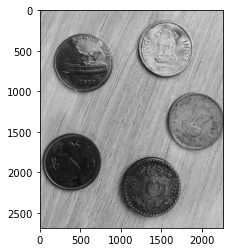

In [58]:
coin_img = cv2.imread("coin-detection.jpg", 0)
plt.imshow(coin_img, cmap='gray')

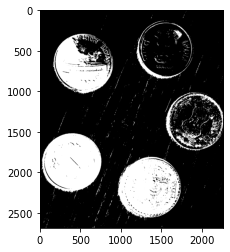

In [61]:
_, coin_bin = cv2.threshold(coin_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

coin_bin = ~coin_bin
plt.imshow(coin_bin, cmap='gray')

In [86]:
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(coin_bin, cv2.MORPH_CLOSE, 
                            kernel, iterations = 2) 
  
# Background area using Dilation 
bg = cv2.dilate(closing, kernel, iterations = 1) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
_, final_coin_img = cv2.threshold(dist_transform, 0.02
                        * dist_transform.max(), 255, 0) 


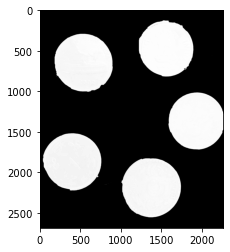

In [90]:
plt.imshow(final_coin_img, cmap='gray')

# SMOOTHENING & DENOISING IMAGES

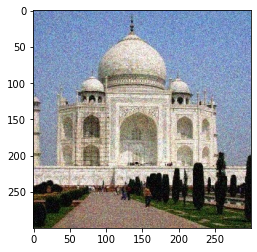

In [146]:
img = cv2.imread('taj_mahal.jpg') 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')

# Blurring Images

# Gaussian Blurring

GB = Σ[Gs(p, q) * Iq] => Space function

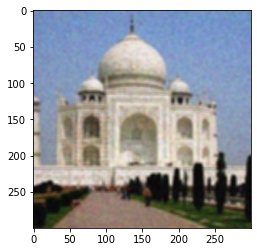

In [147]:
gb_img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

plt.imshow(cv2.cvtColor(gb_img, cv2.COLOR_BGR2RGB), cmap='gray')

# Bilateral Filtering

BF = (1/N)*  Σ [Gs(p, q) * Gr(Ip, Iq) * Iq ] => Space function & Range function

d = neighborhood between p and q

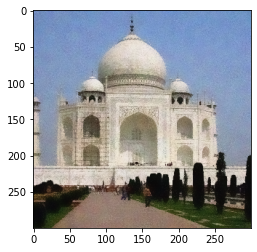

In [145]:
 # Apply bilateral filter with d = 15,  
# sigmaColor (Gr) = sigmaSpace (Gs) = 75. 
bilateral = cv2.bilateralFilter(img, 15, 75, 75) 
  
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB), cmap='gray')

# IMAGE INPAINTING

Gets the n-nearest pixels and replaces the damage stroke with the same color of pixels.

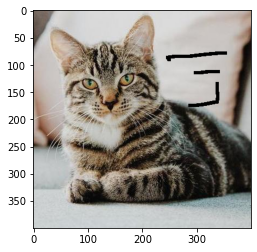

In [134]:
damaged_img = cv2.cvtColor(cv2.imread('cat_damaged.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.imshow(damaged_img, cmap='gray')

## Making mask manually

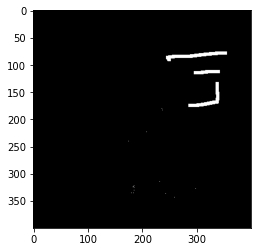

In [140]:
height, width = damaged_img.shape[0], damaged_img.shape[1]
 
for i in range(height):
    
    for j in range(width):
        
        if damaged_img[i, j].sum() > 0: #if not black
            damaged_img[i, j] = 0
            
        else: #if black
            damaged_img[i, j] = [255, 255, 255]

mask = damaged_img
cv2.imwrite('mask.png', mask)
plt.imshow(mask, cmap='gray')

## Using inpaint method

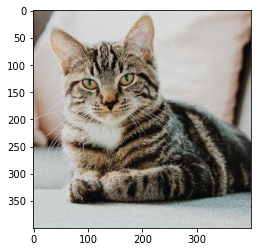

In [142]:
img = cv2.imread('cat_damaged.png')
 
mask = cv2.imread('mask.png', 0)
 

dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
 
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), cmap='gray')